In [2]:
### Importar librerías
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Función lambda para escribir SQL
pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv("youtuhe/Global Youtube Statistics.csv", encoding='ISO-8859-1')

In [8]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [9]:
df.head()

rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2000000.0   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8000000.0   
3           US      Education  ...                     1000000.0   
4           IN  Entertainment  ...                     1000000.0   

   created_year  created_month  created_date  \
0        2006.0            Mar          13.0   
1        2006.0            Mar           5.0   
2        2012.0            Feb          20.0   
3        2006.0            Sep           1.0   
4        2006.0            Sep          20.0   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                     28.1  1.366418e+09               5.36   
1                                     88.2  3.282395e+08              14.70   
2                                     88.2  3.282395e+08              14.70   
3                                     88.2  3.282395e+08              14.70   
4                                     28.1  1.366418e+09               5.36   

   Urban_population   Latitude  Longitude  
0       471031528.0  20.593684  78.962880  
1       270663028.0  37.090240 -95.712891  
2       270663028.0  37.090240 -95.712891  
3       270663028.0  37.090240 -95.712891  
4       471031528.0  20.593684  78.962880  

[5 rows x 28 columns]

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

rank   subscribers      video views    uploads  video_views_rank  \
count 995.000       995.000          995.000    995.000           994.000   
mean  498.000  22982412.060  11039537052.038   9187.126        554248.904   
std   287.376  17526105.341  14110844376.830  34151.352       1362782.210   
min     1.000  12300000.000            0.000      0.000             1.000   
25%   249.500  14500000.000   4288145410.000    194.500           323.000   
50%   498.000  17700000.000   7760819588.000    729.000           915.500   
75%   746.500  24600000.000  13554701853.000   2667.500          3584.500   
max   995.000 245000000.000 228000000000.000 301308.000       4057944.000   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count       879.000            962.000                           939.000   
mean        386.053            745.719                     175610284.794   
std        1232.245           1944.387                     416378166.207   
min           1.000              1.000                             1.000   
25%          11.000             27.000                      20137500.000   
50%          51.000             65.500                      64085000.000   
75%         123.000            139.750                     168826500.000   
max        7741.000           7741.000                    6589000000.000   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count                  995.000                   995.000  ...   
mean                 36886.148                589807.848  ...   
std                  71858.724               1148622.478  ...   
min                      0.000                     0.000  ...   
25%                   2700.000                 43500.000  ...   
50%                  13300.000                212700.000  ...   
75%                  37900.000                606800.000  ...   
max                 850900.000              13600000.000  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count                  995.000                       658.000       990.000   
mean               7081813.920                    349079.132      2012.630   
std               13797037.615                    614355.441         4.513   
min                      0.000                         1.000      1970.000   
25%                 521750.000                    100000.000      2009.000   
50%                2600000.000                    200000.000      2013.000   
75%                7300000.000                    400000.000      2016.000   
max              163400000.000                   8000000.000      2022.000   

       created_date  Gross tertiary education enrollment (%)     Population  \
count       990.000                                  872.000        872.000   
mean         15.746                                   63.628  430387266.752   
std           8.778                                   26.107  472794722.465   
min           1.000                                    7.600     202506.000   
25%           8.000                                   36.300   83355411.000   
50%          16.000                                   68.000  328239523.000   
75%          23.000                                   88.200  328239523.000   
max          31.000                                  113.100 1397715000.000   

       Unemployment rate  Urban_population  Latitude  Longitude  
count            872.000           872.000   872.000    872.000  
mean               9.279     224214981.632    26.633    -14.128  
std                4.888     154687362.709    20.561     84.761  
min                0.750         35588.000   -38.416   -172.105  
25%                5.270      55908316.000    20.594    -95.713  
50%                9.365     270663028.000    37.090    -51.925  
75%               14.700     270663028.000    37.090     78.963  
max               14.720     842933962.000    61.924    138.253  

[8 rows x 21 columns]

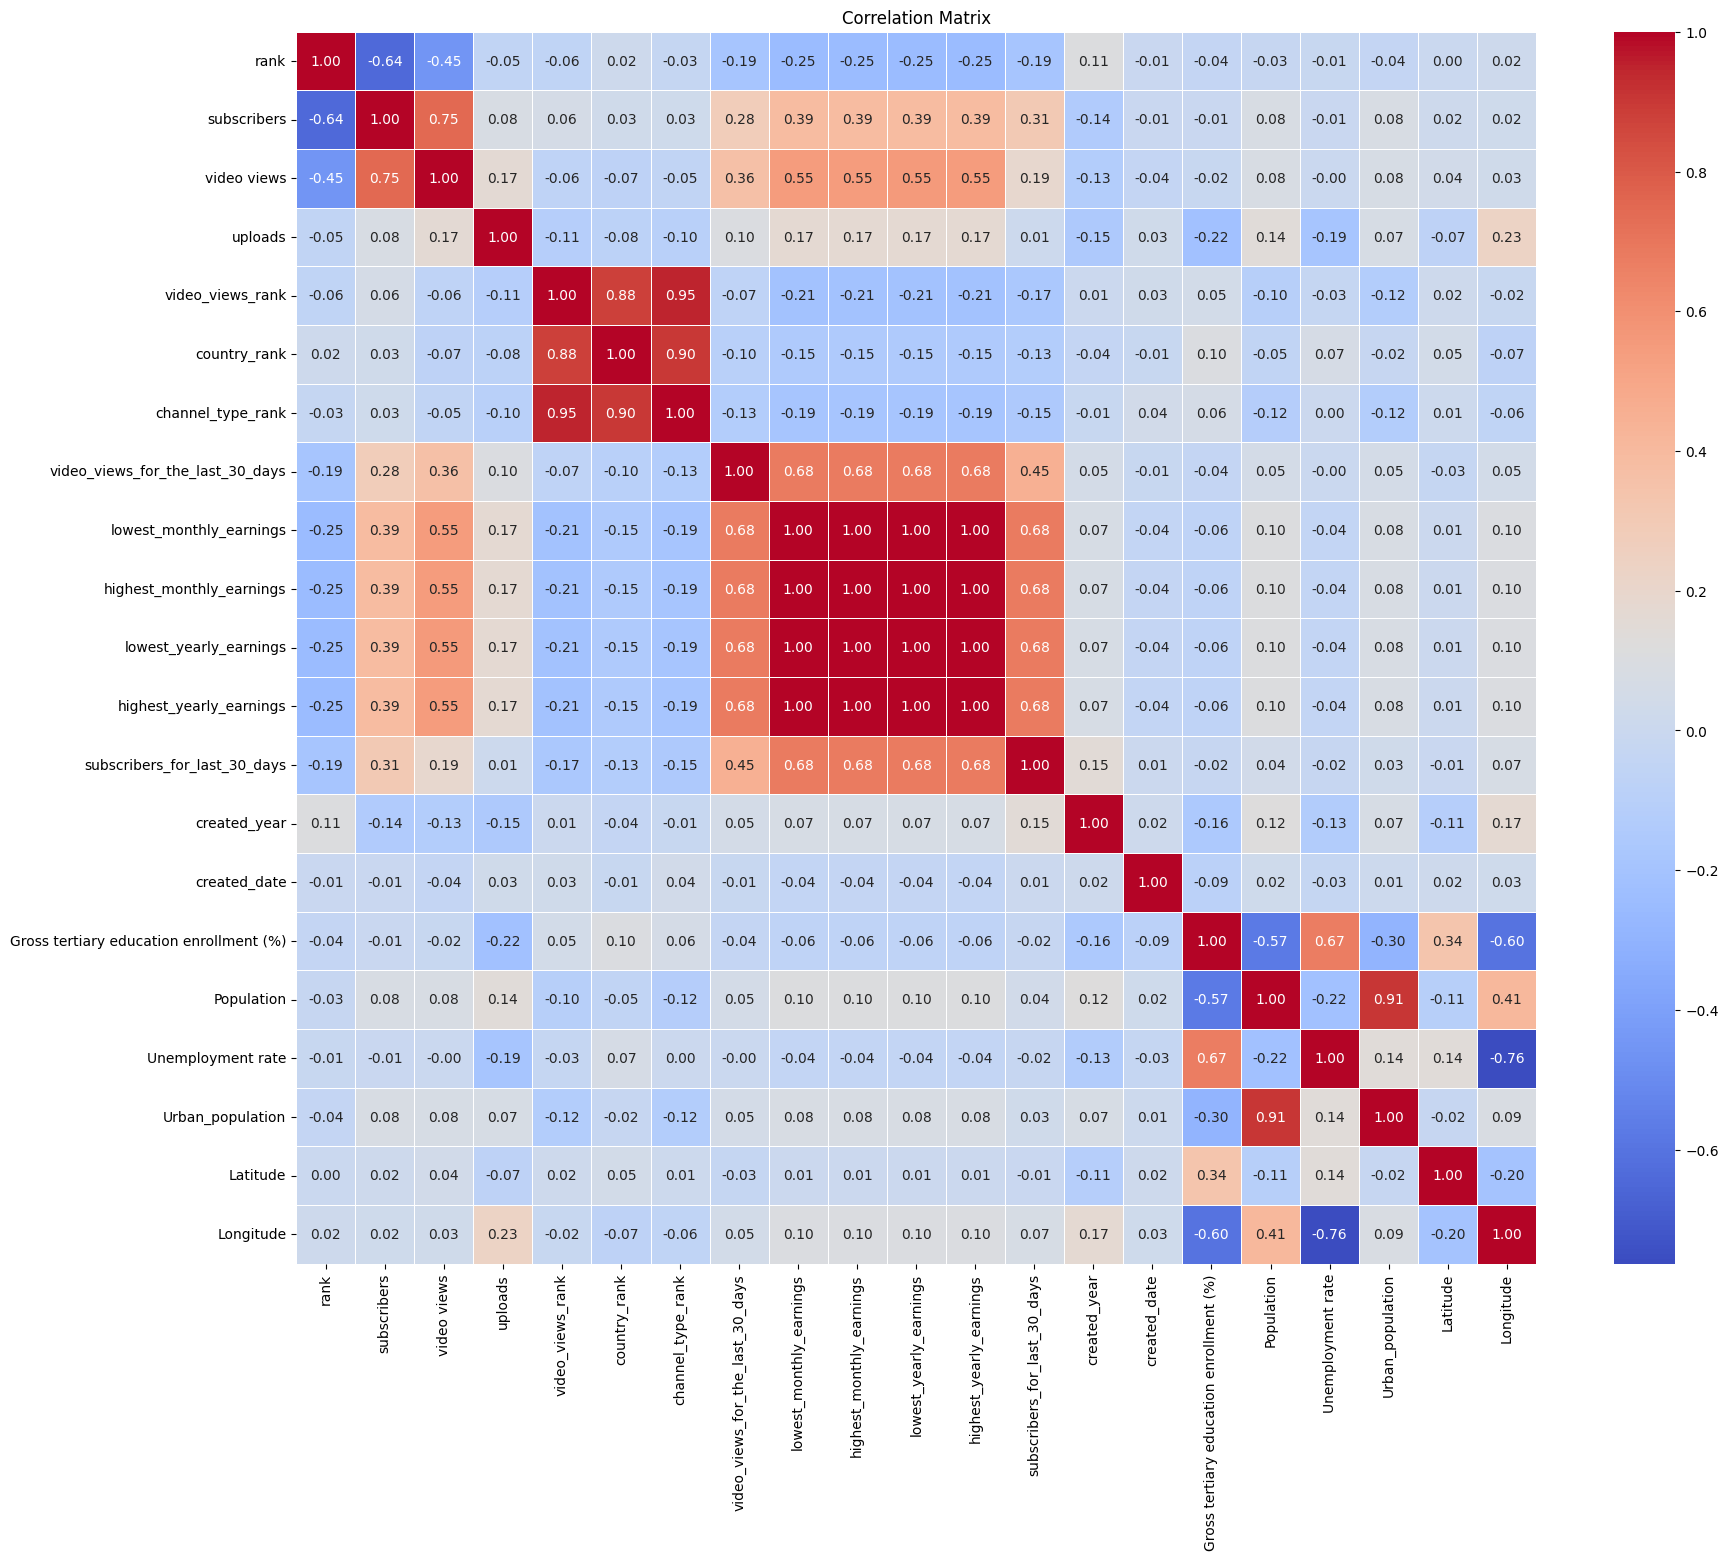

In [5]:
#Exclusión de columnas no relevantes
df_numeric = df.select_dtypes(include='number')
correlation_matrix = df_numeric.corr()

# Configura el estilo de la figura
plt.figure(figsize=(20, 16))

# Crea un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade título
plt.title('Correlation Matrix')

# Muestra la visualización
plt.show()

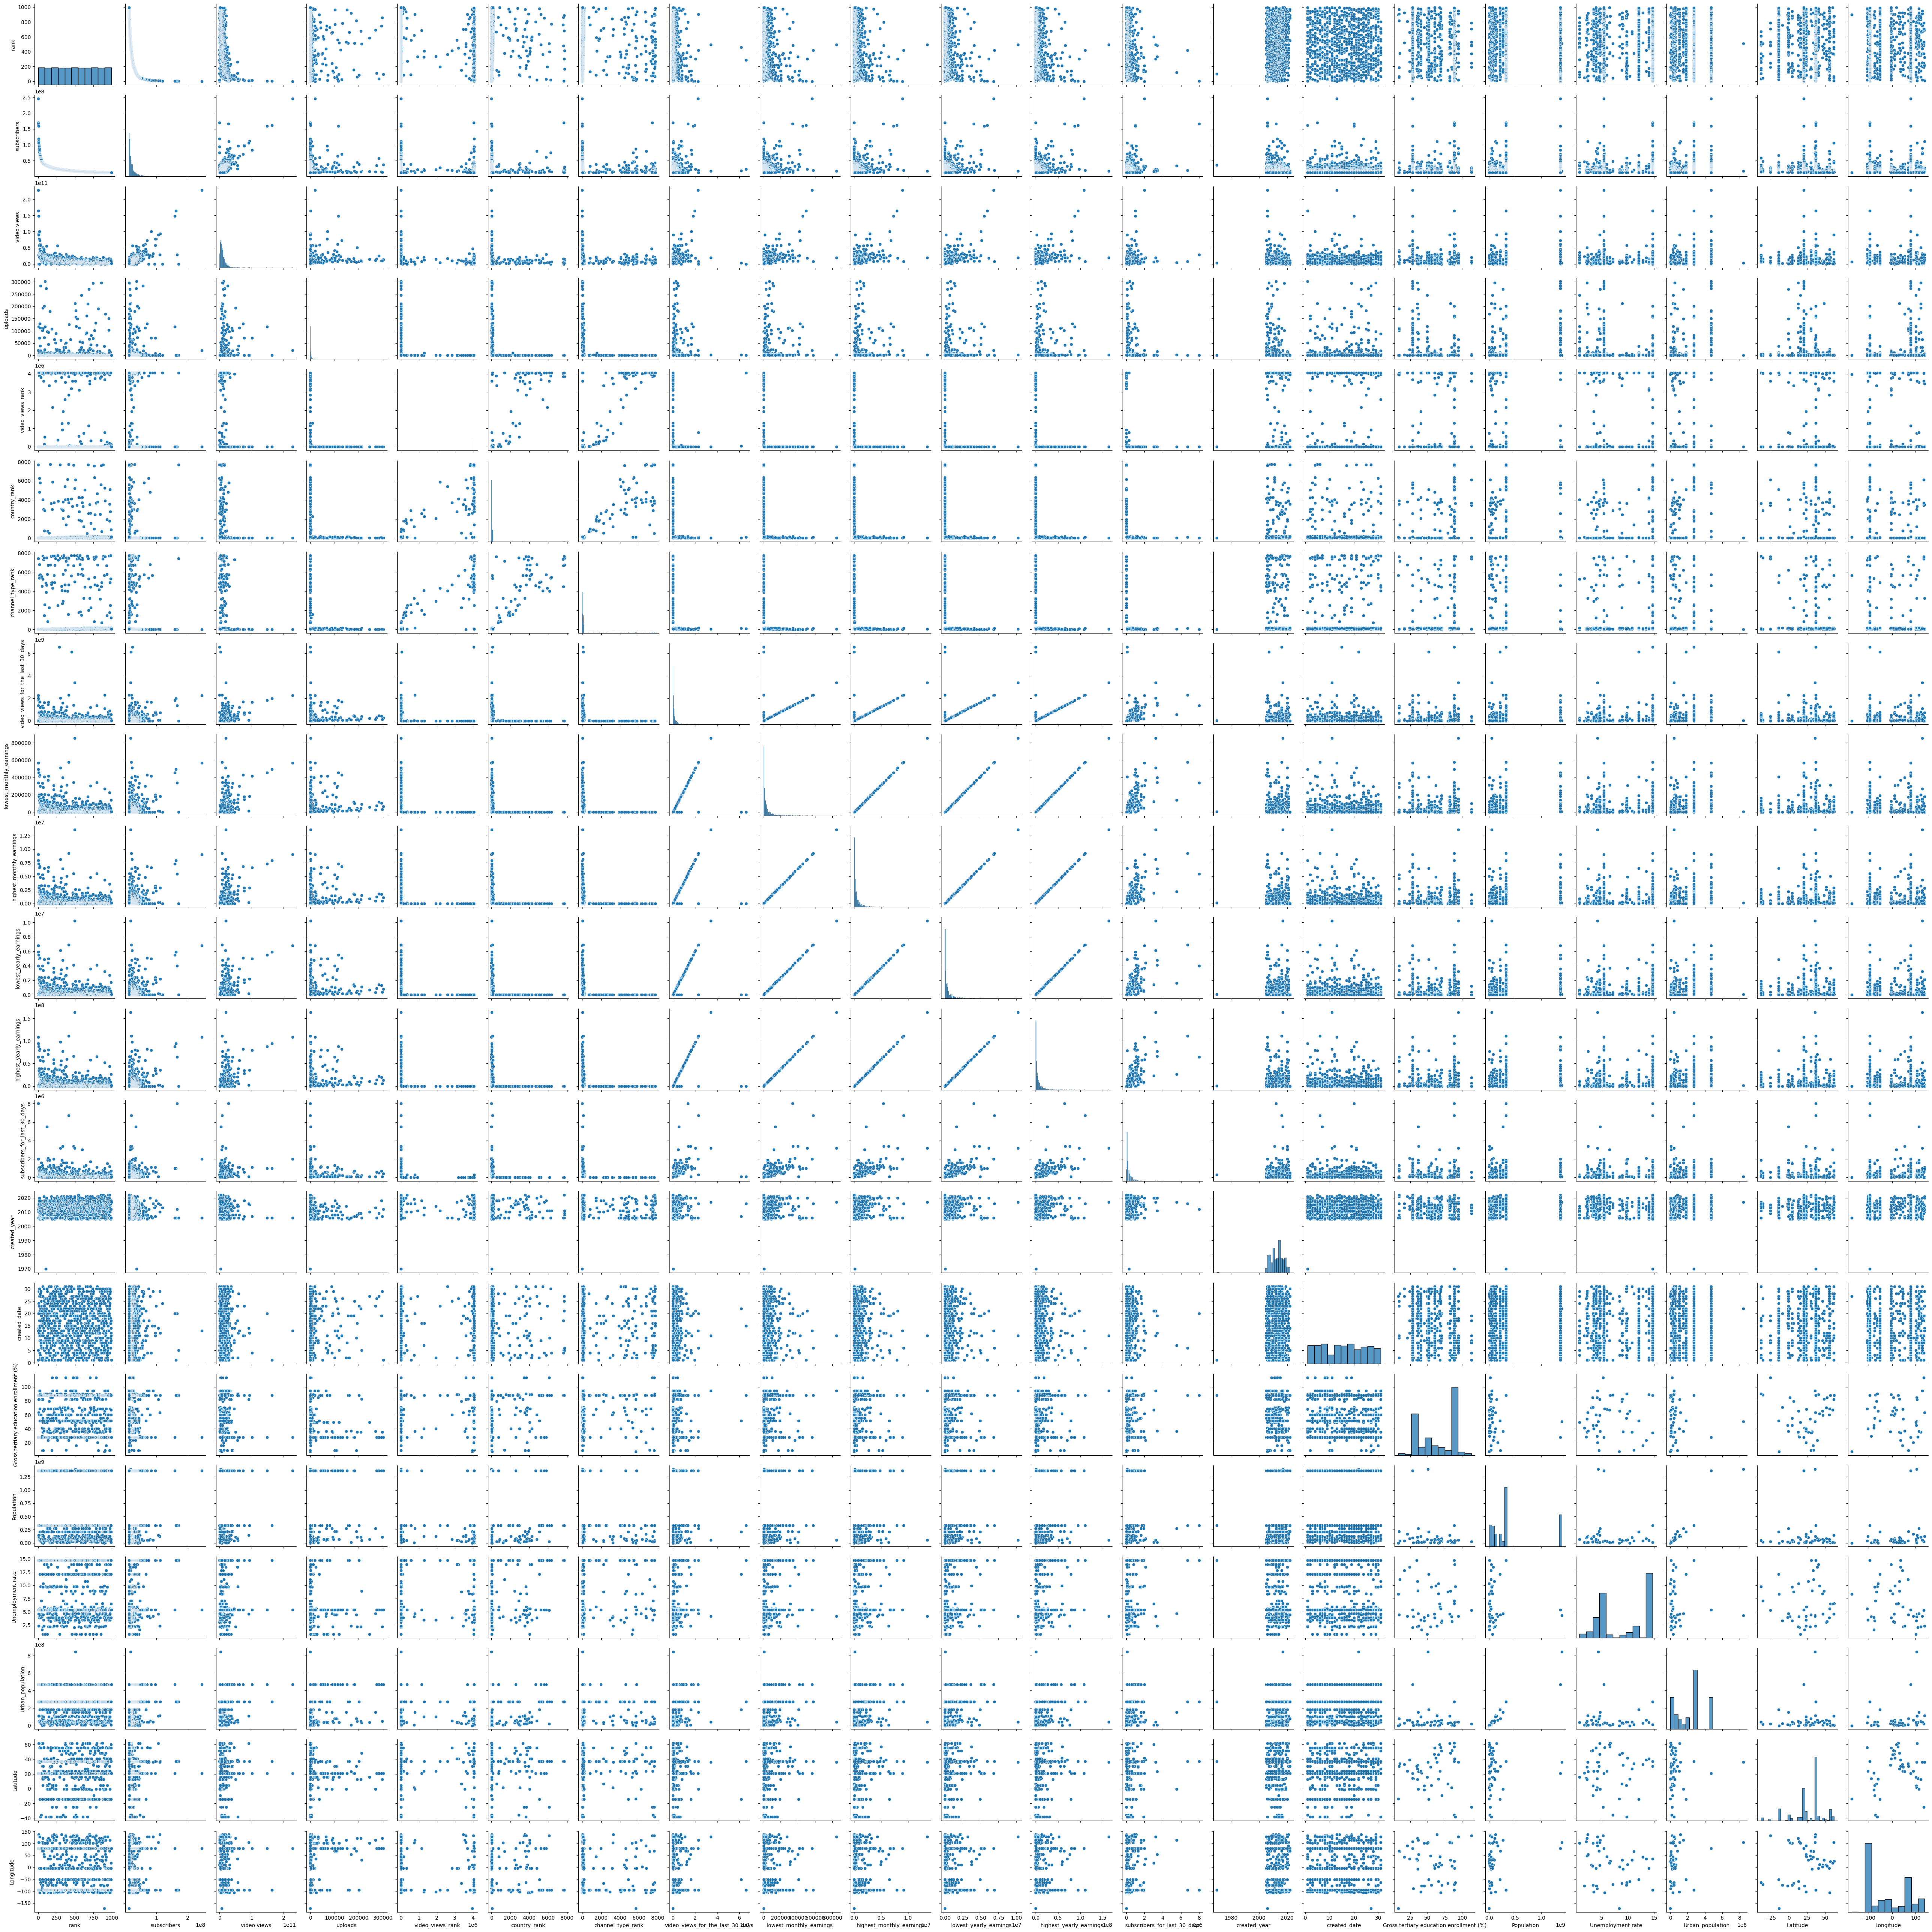

In [15]:
sns.pairplot(df_numeric)

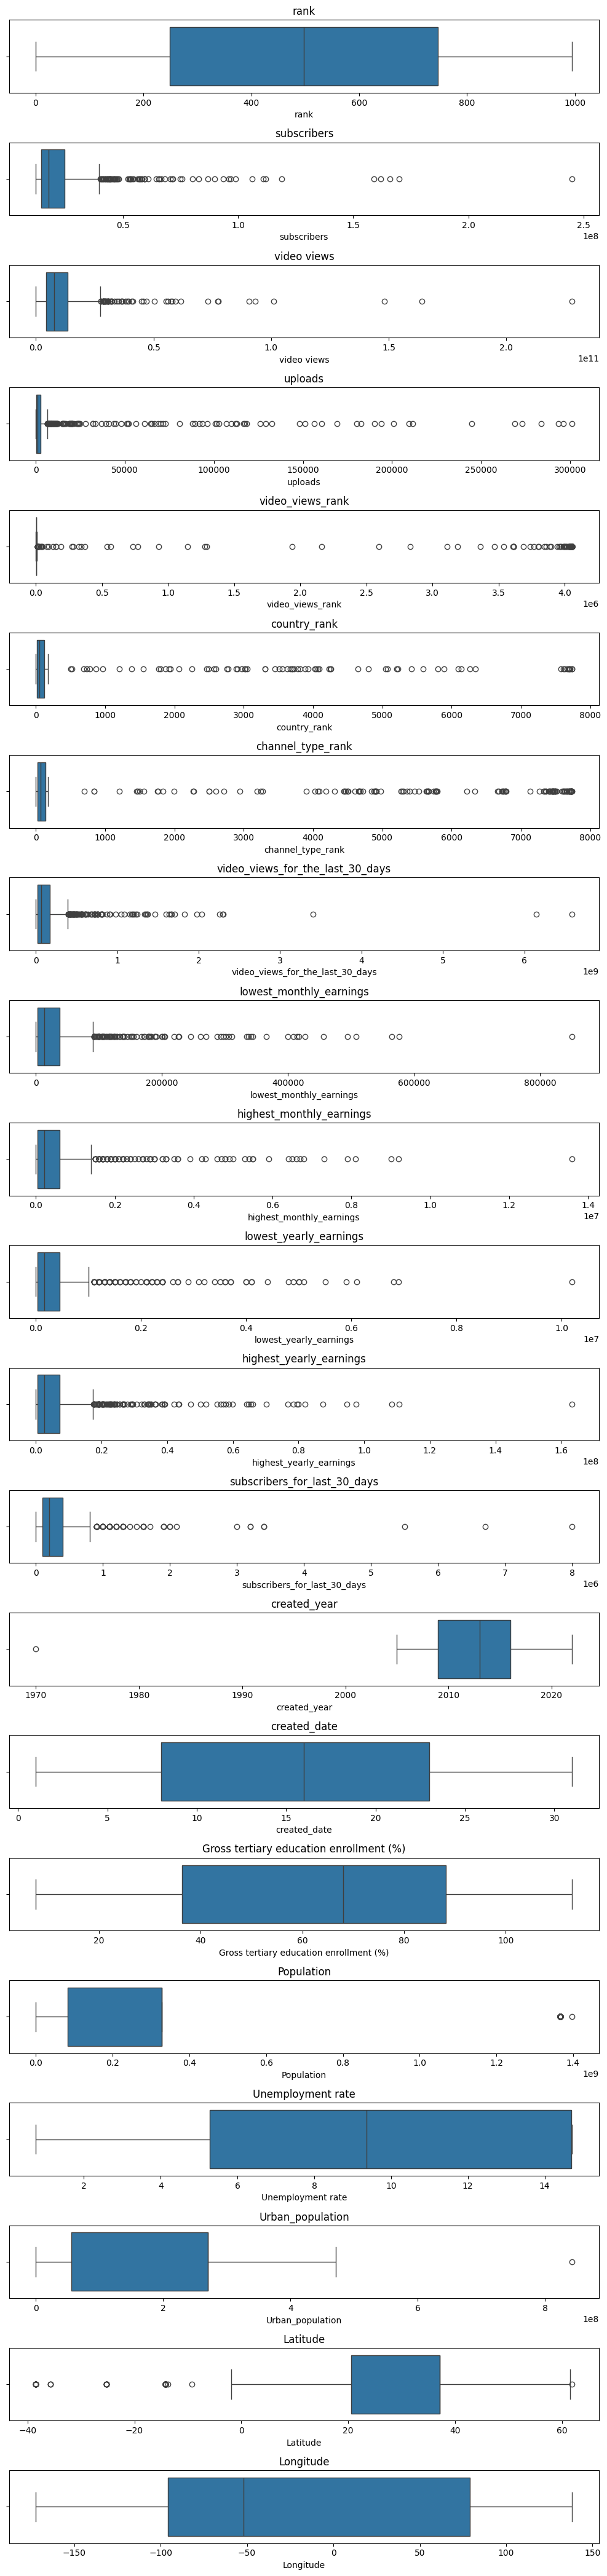

In [6]:
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['Float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [40]:
print(df.columns)


Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


2. Limpieza de Outliers y Tratamiento de datos asuentes

In [7]:
# Lista de columnas con outliers
columns_with_outliers = ['subscribers', 'video views', 'uploads', 'video_views_rank','country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings'
                         ,'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days']

# Definir una función para eliminar los outliers basados en el IQR
def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Agora df no tiene outliers en las columnas especificadas

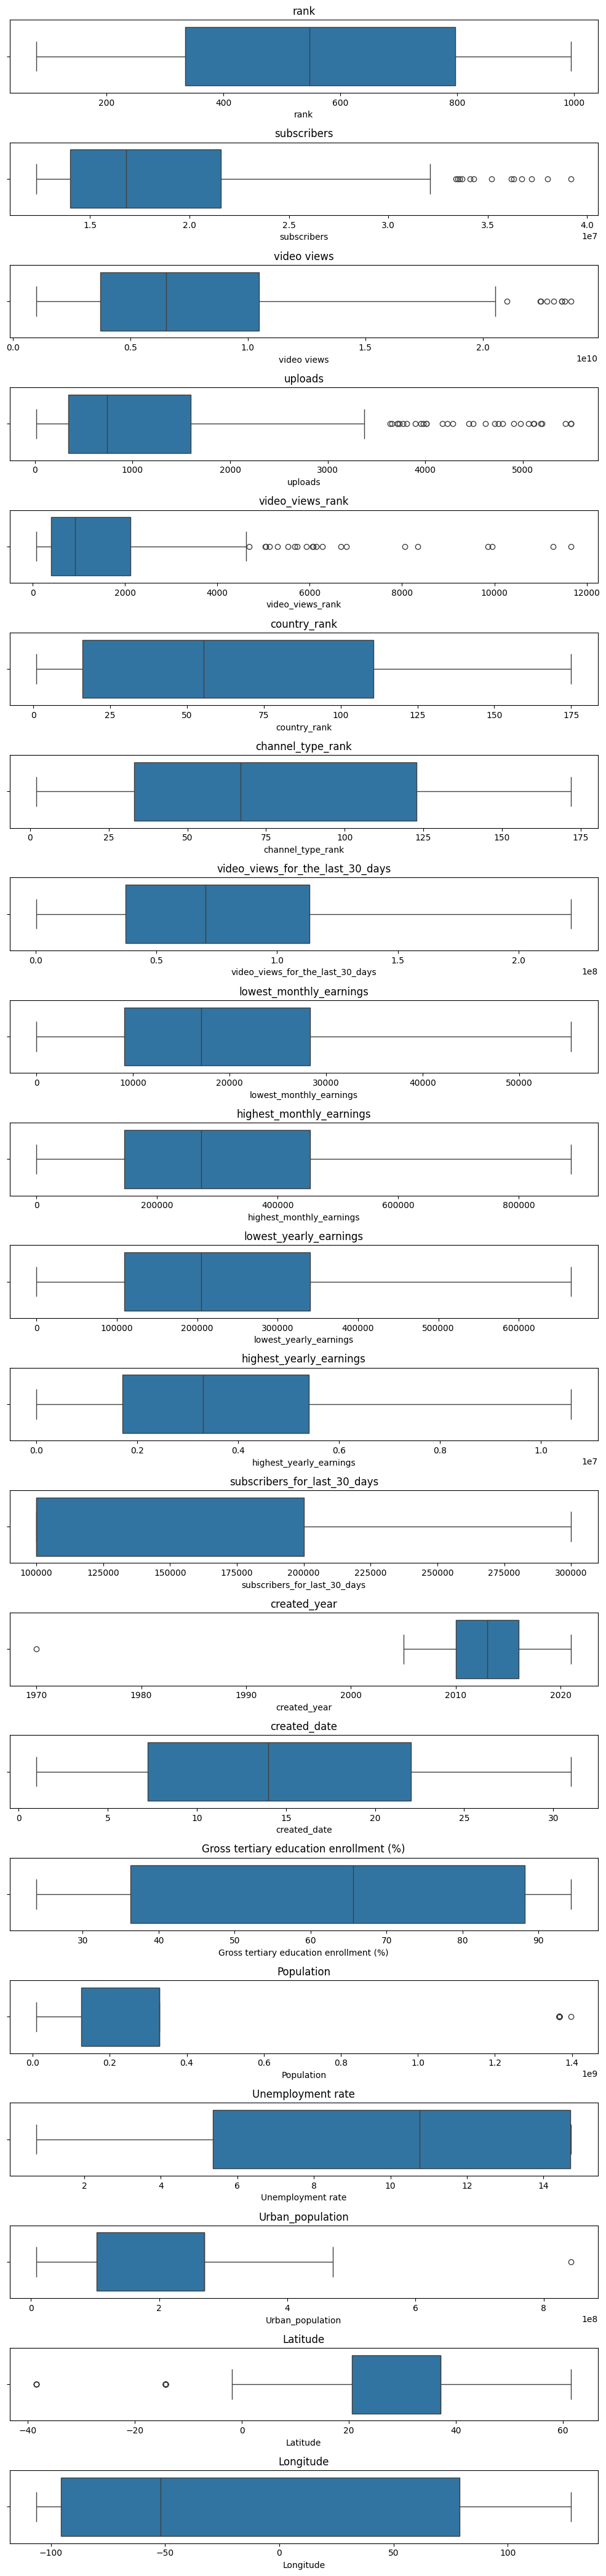

In [8]:
df_numeric = df.select_dtypes(include='number')

# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['Float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [44]:
df.shape

(209, 28)

In [45]:
df.describe()

rank  subscribers     video views  uploads  video_views_rank  \
count 209.000      209.000         209.000  209.000           209.000   
mean  585.134 17630143.541  7139185158.220  898.344          1431.459   
std   242.345  4539389.623  3945905328.336  763.355          1267.914   
min   147.000 12300000.000  1900272833.000   15.000           160.000   
25%   377.000 13800000.000  3920559552.000  323.000           481.000   
50%   575.000 16300000.000  6554000320.000  682.000           912.000   
75%   814.000 20400000.000  9597894786.000 1357.000          1971.000   
max   995.000 31700000.000 17331663193.000 3377.000          5297.000   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count       209.000            209.000                           209.000   
mean         70.120             84.081                      82097922.364   
std          56.681             49.591                      53038537.622   
min           1.000              2.000                        413774.000   
25%          15.000             38.000                      39228000.000   
50%          64.000             86.000                      72911000.000   
75%         116.000            129.000                     112986000.000   
max         175.000            172.000                     214803000.000   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count                  209.000                   209.000  ...   
mean                 20225.536                323569.378  ...   
std                  13467.504                215466.413  ...   
min                      0.000                     0.000  ...   
25%                   9300.000                148700.000  ...   
50%                  18000.000                287500.000  ...   
75%                  28200.000                451100.000  ...   
max                  53700.000                859200.000  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count                  209.000                       209.000       209.000   
mean               3882686.124                    146889.952      2013.196   
std                2590047.998                     70043.890         3.635   
min                      0.000                    100000.000      2005.000   
25%                1800000.000                    100000.000      2011.000   
50%                3400000.000                    100000.000      2014.000   
75%                5400000.000                    200000.000      2016.000   
max               10300000.000                    300000.000      2021.000   

       created_date  Gross tertiary education enrollment (%)     Population  \
count       209.000                                  206.000        206.000   
mean         14.421                                   64.043  418789718.500   
std           8.855                                   24.906  458746310.870   
min           1.000                                   23.900    9770529.000   
25%           7.000                                   40.200  126014024.000   
50%          14.000                                   68.000  328239523.000   
75%          22.000                                   88.200  328239523.000   
max          31.000                                   94.300 1397715000.000   

       Unemployment rate  Urban_population  Latitude  Longitude  
count            206.000           206.000   206.000    206.000  
mean               9.582     226879026.388    28.022    -25.772  
std                4.927     153583911.996    19.833     79.006  
min                0.750       8479744.000   -38.416   -106.347  
25%                4.857     102626859.000    20.594    -95.713  
50%               10.325     270663028.000    37.090    -57.771  
75%               14.700     270663028.000    37.090     78.963  
max               14.720     842933962.000    61.524    127.767  

[8 rows x 21 columns]

In [9]:
# Identificacion de datos ausentes
df.isnull().sum()

rank                                        0
Youtuber                                    0
subscribers                                 0
video views                                 0
category                                   15
Title                                       0
uploads                                     0
Country                                     5
Abbreviation                                5
channel_type                                0
video_views_rank                            0
country_rank                                0
channel_type_rank                           0
video_views_for_the_last_30_days            0
lowest_monthly_earnings                     0
highest_monthly_earnings                    0
lowest_yearly_earnings                      0
highest_yearly_earnings                     0
subscribers_for_last_30_days                0
created_year                                0
created_month                               0
created_date                      

In [10]:
### Eliminar filas con valores nulos
df = df.dropna()

In [11]:
df.shape

(258, 28)

In [12]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

3. Creación de Features

In [13]:
# Redondea los valores en la columa 'created_year' y maneja los valores no finitos
df['created_year'] = df['created_year'].apply(lambda x: round(x) if pd.notna(x) and pd.notnull(x) and x != float('inf') and x != float('-inf') else x).astype('Int64')

# Convierte la columna 'created_year' a tipo de datetime
df['created_year_date'] = pd.to_datetime(df['created_year'], format='%Y', errors='coerce')

# Calcula el tiempo transcurrido desde la fecha de creación
current_date = datetime.now()
df['years_since_creation'] = (current_date - df['created_year_date']).dt.days / 365.25

In [14]:
# Configura pandas para que muestr todas las columnas
pd.set_option('display.max_columns', None)

df

rank                  Youtuber  subscribers     video views  \
79     80              XXXTENTACION     39200000 10507474316.000   
90     91              Daddy Yankee     38000000 22731415608.000   
94     95         Jkk Entertainment     37200000 16402066717.000   
97     98                Bruno Mars     36700000 19378155425.000   
101   102                   YouTube     36300000  3010784935.000   
..    ...                       ...          ...             ...   
980   981                  Zee Kids     12400000  7683670251.000   
984   985      bharatzkitchen HINDI     12400000  2315226648.000   
989   990                 Migos ATL     12400000  6993406259.000   
991   992  Free Fire India Official     12300000  1674409945.000   
994   995              Make Joke Of     12300000  2129773714.000   

             category                     Title  uploads        Country  \
79              Music              XXXTENTACION      133  United States   
90              Music              Daddy Yankee      505  United States   
94             Comedy         Jkk Entertainment      220          India   
97              Music                Bruno Mars       99  United States   
101   News & Politics                   YouTube      744  United States   
..                ...                       ...      ...            ...   
980  Film & Animation                  Zee Kids     1212          India   
984     Howto & Style      bharatzkitchen HINDI      729          India   
989             Music                 Migos ATL       99  United States   
991    People & Blogs  Free Fire India Official     1500          India   
994            Comedy              Make Joke Of       62          India   

    Abbreviation   channel_type  video_views_rank  country_rank  \
79            US          Music           403.000        24.000   
90            US          Music            92.000        27.000   
94            IN         Comedy           178.000        24.000   
97            US          Music           134.000        30.000   
101           US  Entertainment          2860.000        32.000   
..           ...            ...               ...           ...   
980           IN  Entertainment           709.000       124.000   
984           IN          Howto          4042.000       124.000   
989           US  Entertainment           833.000       175.000   
991           IN          Games          6141.000       125.000   
994           IN         Comedy          4568.000       125.000   

     channel_type_rank  video_views_for_the_last_30_days  \
79              29.000                      58362000.000   
90              33.000                     205594000.000   
94               3.000                      49861000.000   
97              34.000                     175243000.000   
101              5.000                      21103000.000   
..                 ...                               ...   
980            172.000                      95163000.000   
984             38.000                      30968000.000   
989            171.000                      49412000.000   
991             69.000                      64735000.000   
994             44.000                      24000000.000   

     lowest_monthly_earnings  highest_monthly_earnings  \
79                 14600.000                233400.000   
90                 51400.000                822400.000   
94                 12500.000                199400.000   
97                 43800.000                701000.000   
101                 5300.000                 84400.000   
..                       ...                       ...   
980                23800.000                380700.000   
984                 7700.000                123900.000   
989                12400.000                197600.000   
991                16200.000                258900.000   
994                 6000.000                 96000.000   

     lowest_yearly_earnings  highest_yearly_earnings  \
79      

4. Manejo de datos categóricos

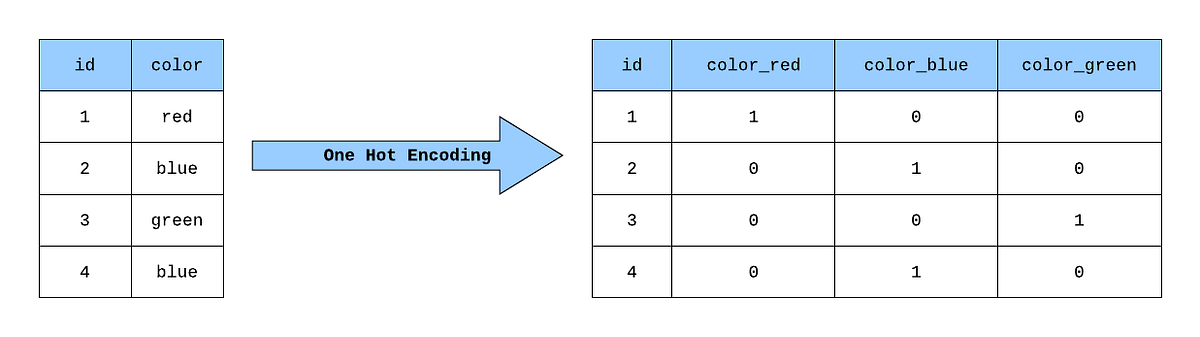

In [15]:
# Especifica la ruta de la imagen local
ruta_imagen = 'youtuhe/one_hot_encoding.png'

# Muestra la imagen
Image(filename = ruta_imagen)

In [16]:
# Aplicar One-Hot Encoding a la columna 'channel_type'
df = pd.get_dummies(df, columns=['category'], dtype=int)

In [17]:
df

rank                  Youtuber  subscribers     video views  \
79     80              XXXTENTACION     39200000 10507474316.000   
90     91              Daddy Yankee     38000000 22731415608.000   
94     95         Jkk Entertainment     37200000 16402066717.000   
97     98                Bruno Mars     36700000 19378155425.000   
101   102                   YouTube     36300000  3010784935.000   
..    ...                       ...          ...             ...   
980   981                  Zee Kids     12400000  7683670251.000   
984   985      bharatzkitchen HINDI     12400000  2315226648.000   
989   990                 Migos ATL     12400000  6993406259.000   
991   992  Free Fire India Official     12300000  1674409945.000   
994   995              Make Joke Of     12300000  2129773714.000   

                        Title  uploads        Country Abbreviation  \
79               XXXTENTACION      133  United States           US   
90               Daddy Yankee      505  United States           US   
94          Jkk Entertainment      220          India           IN   
97                 Bruno Mars       99  United States           US   
101                   YouTube      744  United States           US   
..                        ...      ...            ...          ...   
980                  Zee Kids     1212          India           IN   
984      bharatzkitchen HINDI      729          India           IN   
989                 Migos ATL       99  United States           US   
991  Free Fire India Official     1500          India           IN   
994              Make Joke Of       62          India           IN   

      channel_type  video_views_rank  country_rank  channel_type_rank  \
79           Music           403.000        24.000             29.000   
90           Music            92.000        27.000             33.000   
94          Comedy           178.000        24.000              3.000   
97           Music           134.000        30.000             34.000   
101  Entertainment          2860.000        32.000              5.000   
..             ...               ...           ...                ...   
980  Entertainment           709.000       124.000            172.000   
984          Howto          4042.000       124.000             38.000   
989  Entertainment           833.000       175.000            171.000   
991          Games          6141.000       125.000             69.000   
994         Comedy          4568.000       125.000             44.000   

     video_views_for_the_last_30_days  lowest_monthly_earnings  \
79                       58362000.000                14600.000   
90                      205594000.000                51400.000   
94                       49861000.000                12500.000   
97                      175243000.000                43800.000   
101                      21103000.000                 5300.000   
..                                ...                      ...   
980                      95163000.000                23800.000   
984                      30968000.000                 7700.000   
989                      49412000.000                12400.000   
991                      64735000.000                16200.000   
994                      24000000.000                 6000.000   

     highest_monthly_earnings  lowest_yearly_earnings  \
79                 233400.000              175100.000   
90                 822400.000              616800.000   
94                 199400.000              149600.000   
97                 701000.000              525700.000   
101                 84400.000               63300.000   
..                        ...                     ...   
980                380700.000              285500.000   
984                123900.000               92900.000   
989                197600.000              148200.000   
991                258900.000              194200.000   
994                 96000.000               72000.